In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [75]:
# Read in csv data
attrition_df = pd.read_csv("data/IBM_attrition_data.csv")
data = attrition_df.copy()
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [76]:
len(data)

1470

In [77]:
# Drop unnecessary columns
data = data.drop(["Over18", "EmployeeCount", "StandardHours", "EmployeeNumber"], axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [78]:
len(data)

1470

In [79]:
# Create train and test set from data
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [80]:
# Segregating target and feature variables 
data = train_set.drop("Attrition", axis=1)
data_labels = train_set["Attrition"].copy()
# data_labels = pd.get_dummies(data_labels, drop_first=True)
len(data)

1176

In [81]:
len(data_labels)

1176

In [82]:
data_labels

1097     No
727      No
254      No
1175     No
1341     No
       ... 
1130     No
1294     No
860     Yes
1459     No
1126     No
Name: Attrition, Length: 1176, dtype: object

In [83]:
# Preprocessing categorical columns 
def preprocess_cat_columns(data):
    data["Education"] = data["Education"].map({1:"Below College", 2:"College", 3:"Bachelor", 4:"Master",5:"Doctor"}) 
    data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["JobInvolvement"] = data["JobInvolvement"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["JobSatisfaction"] = data["JobSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["PerformanceRating"] = data["PerformanceRating"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    data["WorkLifeBalance"] = data["WorkLifeBalance"].map({1:"Bad", 2:"Good", 3:"Better", 4:"Best"})
    return data


In [84]:
# Number pipeline transformer 
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

# Complete transformation for categorical and numeric data
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["BusinessTravel", "Department", "Education", 
                    "EducationField", "EnvironmentSatisfaction", "Gender",
                    "JobInvolvement", "JobRole", "JobSatisfaction", 
                    "MaritalStatus", "OverTime", "PerformanceRating", 
                    "RelationshipSatisfaction", "WorkLifeBalance"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [85]:
##from raw data to processed data in 2 steps
preprocessed_df = preprocess_cat_columns(data)
prepared_data = pipeline_transformer(data)
prepared_data

array([[-1.38855944, -1.10813858,  1.44039645, ...,  0.        ,
         1.        ,  0.        ],
       [-2.04073779, -1.2634814 , -0.52269928, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84507748,  1.10364737,  1.31770296, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.60595222,  1.1258392 , -0.76808624, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84507748,  1.42666182,  0.45884859, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.43754676, -1.32019386, -0.03192534, ...,  0.        ,
         1.        ,  0.        ]])

In [86]:
prepared_data.shape

(1176, 71)

In [87]:
## Selecting and Training Models 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(prepared_data, data_labels)

LogisticRegression()

In [88]:
print(f"Logisitc Regression Training Data Score: {log_reg.score(prepared_data, data_labels)}")

Logisitc Regression Training Data Score: 0.8988095238095238


In [89]:
## Selecting and Training Models 
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(prepared_data, data_labels)

DecisionTreeClassifier()

In [90]:
print(f"Decision Tree Training Data Score: {decision_tree.score(prepared_data, data_labels)}")

Decision Tree Training Data Score: 1.0


In [91]:
# Predicitons using Decision Tree 

attrition_predict = decision_tree.predict(prepared_data)
print(f"First 10 Predictions: {attrition_predict[:25]}")

First 10 Predictions: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [92]:
# Random Forest Model 
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(prepared_data, data_labels)

RandomForestClassifier()

In [93]:
print(f"Random Forest Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

Random Forest Training Data Score: 1.0


In [94]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(prepared_data, data_labels)

SVC(kernel='linear')

In [95]:
print(f"SVC Training Data Score: {svc_model.score(prepared_data, data_labels)}")

SVC Training Data Score: 0.9022108843537415


In [96]:
# Hyperparameter Runing w/ GridSearchCV
from sklearn.model_selection import GridSearchCV

svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [97]:
# criterion = ['gini', 'entropy']
# param_grid = {'criterion': criterion, 'max_features': [5, 10, 15, 20], "n_estimators": [1, 5, 10, 15, 20]}
# grid_search = GridSearchCV(forest_clf, param_grid, verbose=0)

In [98]:
criterion = ['gini', 'entropy']
param_grid = {'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]}
grid_search = GridSearchCV(svc_model, param_grid, verbose=0)

In [99]:
grid_search.fit(prepared_data, data_labels)

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]})

In [100]:
# Best Params
print(grid_search.best_params_)

{'C': 5, 'gamma': 0.0001}


In [101]:
# # Checking feature importance 
# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances

In [102]:
# numerics = ['int64']
# num_attrs = list(data.select_dtypes(include=numerics))

# attrs = num_attrs 
# sorted(zip(attrs, feature_importances), reverse=True)

In [103]:
# Evaluating entire system on Test Data
final_model = grid_search.best_estimator_

X_test = test_set.drop("Attrition", axis=1)
y_test = test_set["Attrition"].copy()

X_test_preprocessed = preprocess_cat_columns(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

print('Test Acc: %.3f' % grid_search.score(X_test_prepared, y_test))

Test Acc: 0.874


In [104]:
# Make Predictions 
predictions = final_model.predict(X_test_prepared)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No']
First 10 Actual labels: ['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [105]:
# Predictions vs. actual df
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No
...,...,...
289,No,No
290,No,No
291,No,No
292,No,No


In [106]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[241  14]
 [ 23  16]]


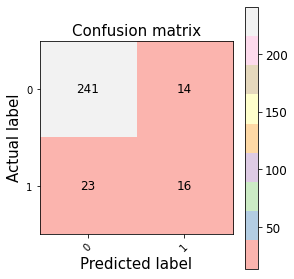

In [107]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [108]:
#[row, column]
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

In [109]:
 print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))

True Positives: 16
True Negatives: 241
False Positives: 14
False Negatives: 23


In [110]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [111]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Accuracy Math:" + str((tp + tn) / float(tp + tn + fp + fn)))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Sklearn: " + str(accuracy))

Accuracy Math:0.8741496598639455
Accuracy Sklearn: 0.8741496598639455


In [112]:
# Classification Sensitivity: When the actual value is positive, how often is the prediction correct?

print("Sensitivity Math:" + str(tp / float(fn + tp))) 

recall = recall_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Sensitivity Sklearn: " + str(recall))

Sensitivity Math:0.41025641025641024
Sensitivity Sklearn: 0.41025641025641024


In [113]:
# Classification Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision Math:" + str(tp / float(tp + fp))) 

precision = precision_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Precision Sklearn: " + str(precision))

Precision Math:0.5333333333333333
Precision Sklearn: 0.5333333333333333


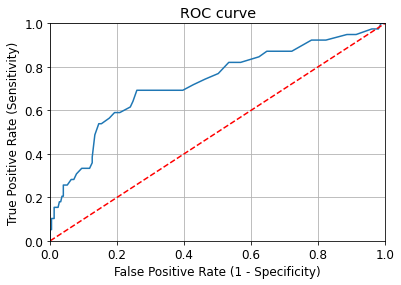

In [114]:
fpr, tpr, thresholds = roc_curve([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [115]:
# AUC is the percentage of the ROC plot that is underneath the curve:
# AUC is useful as a single number summary of classifier performance

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(roc_auc_score([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1]))

0.7273001508295626


In [116]:
 # The F1 score can be interpreted as a weighted (harmonic) average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
 
print("Precision Math:" + str(2 * (precision * recall) / (precision + recall))) 

f1 = f1_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Precision Sklearn: " + str(f1))

Precision Math:0.463768115942029
Precision Sklearn: 0.463768115942029
